# Boston Housing Prices

### Task:
This explores a regression task is to find the median price of a Boston house (in thousands of dollars) using decision trees.

### Notes on dataset:
- 506 samples (houses)
- output (continuous): medv - median value of owner-occupied homes in \$1000s.
- 13 input features:
    - crim: per capita crime rate by town.
    - zn - proportion of residential land zoned for lots over 25,000 sq.ft.
    - indus - proportion of non-retail business acres per town.
    - chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    - nox - nitrogen oxides concentration (parts per 10 million).
    - rm - average number of rooms per dwelling.
    - age - proportion of owner-occupied units built prior to 1940.
    - dis - weighted mean of distances to five Boston employment centres.
    - rad - index of accessibility to radial highways.
    - tax - full-value property-tax rate per $10,000.
    - ptratio - pupil-teacher ratio by town.
    - black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    - lstat - lower status of the population (percent).


### Other notes:
This notebook is set up such that most code is encapsulated in functions. Scroll down to 'Start Here' for the beginning of the analysis of this dataset.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    '''Load the Boston dataset.'''
    boston = datasets.load_boston()
    return boston

def explore_city_data(city_data):
    '''Calculate the Boston housing statistics.'''

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    print("Data Size: ", housing_prices.size)
    print("Number of features: ", housing_features.size, housing_features.shape)
    print("Minimum (thousands): ", np.min(housing_prices))
    print("Maximum (thousands): ", np.max(housing_prices))
    print("Mean (thousands): ", np.mean(housing_prices))
    print("Median (thousands): ", np.median(housing_prices))
    print("Standard Deviation (thousands): ", np.std(housing_prices))

In [3]:
def performance_metric(label, prediction):
    '''Calculate and return the appropriate performance metric.'''
    mae = mean_absolute_error(label, prediction)
    return mae

def split_data(city_data):
    '''Randomly shuffle the sample set. Divide it into training and testing set.'''

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    return X_train, y_train, X_test, y_test

In [4]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    '''Calculate the performance of the model after a set of training data.'''

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.linspace(1, len(X_train), 50)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print("Decision Tree with Max Depth: ", depth)
    # pdb.set_trace()
    for i, s in enumerate(sizes):
        s = int(s)
        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)


def learning_curve_graph(sizes, train_err, test_err):
    '''Plot training and test error as a function of the training size.'''

    plt.figure()
    plt.title('Decision Trees: Performance vs Training Size')
    plt.plot(sizes, test_err, lw=2, label = 'test error')
    plt.plot(sizes, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Training Size')
    plt.ylabel('Error')
    plt.show()

In [5]:
def model_complexity(X_train, y_train, X_test, y_test):
    '''Calculate the performance of the model as model complexity increases.'''

    print("Model Complexity: ")

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)


def model_complexity_graph(max_depth, train_err, test_err):
    '''Plot training and test error as a function of the depth of the decision tree learn.'''

    plt.figure()
    plt.title('Decision Trees: Performance vs Max Depth')
    plt.plot(max_depth, test_err, lw=2, label = 'test error')
    plt.plot(max_depth, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Max Depth')
    plt.ylabel('Error')
    plt.show()

In [6]:
def fit_predict_model(city_data, sample_x):
    '''Find and tune the optimal model. Make a prediction on housing data.'''

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}


    # 1. Finding the best performance metric
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    scorer = make_scorer(performance_metric, greater_is_better=False)

    # 2. Using gridearch to fine tune the Decision Tree Regressor and find the best model
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = GridSearchCV(regressor, parameters, scoring=scorer)

    # Fit the learner to the training data
    reg.fit(X, y)
    print("Final Model: ", reg.best_estimator_)

    # Use the model to predict the output of a particular sample
    y = reg.predict(sample_x)
    # print reg.best_params_
    print("House: " + str(sample_x))
    print("Prediction: " + str(y))

# Start Here

In [7]:
'''Analyze the Boston housing data.'''

# Load data
city_data = load_data()

# Explore the data
explore_city_data(city_data)

Data Size:  506
Number of features:  6578 (506, 13)
Minimum (thousands):  5.0
Maximum (thousands):  50.0
Mean (thousands):  22.5328063241
Median (thousands):  21.2
Standard Deviation (thousands):  9.18801154528


Decision Tree with Max Depth:  1


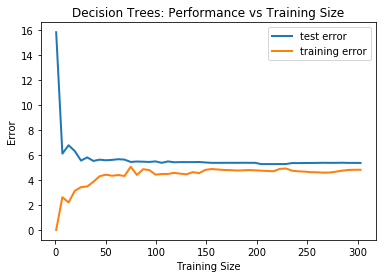

Decision Tree with Max Depth:  2


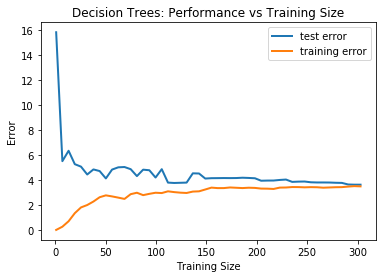

Decision Tree with Max Depth:  3


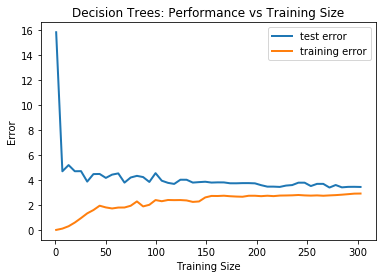

Decision Tree with Max Depth:  4


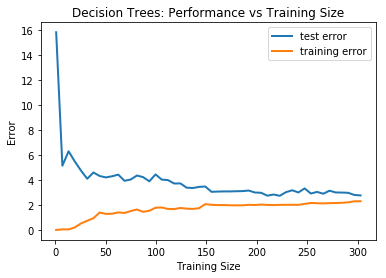

Decision Tree with Max Depth:  5


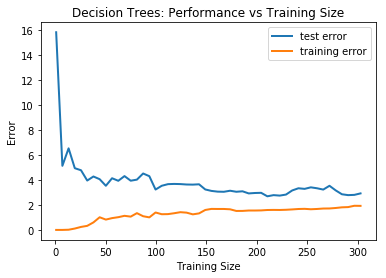

Decision Tree with Max Depth:  6


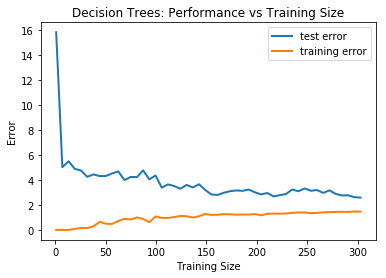

Decision Tree with Max Depth:  7


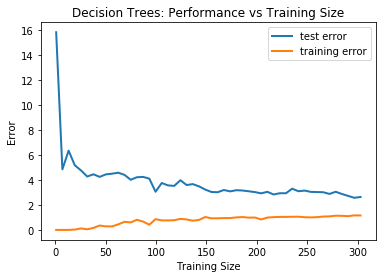

Decision Tree with Max Depth:  8


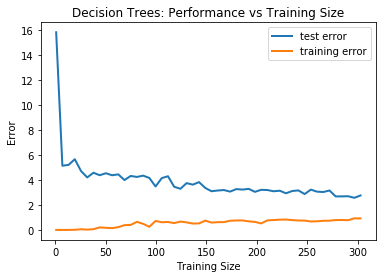

Decision Tree with Max Depth:  9


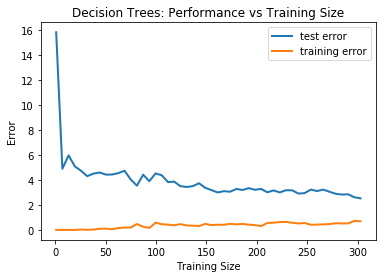

Decision Tree with Max Depth:  10


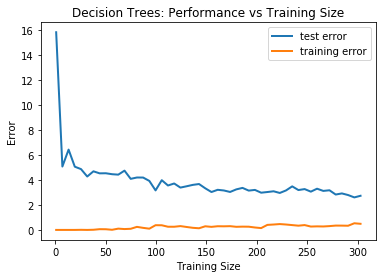

As training size increases, training error increases and the testing error decreases. 

With a max depth of 1, the model suffers high bias since the error is high, but the gap between the training and testing curves is small. With a max depth of 10, there is high variance since the gap between testing and training errors is large.


In [8]:
'''Evaluate and validate the performanance of a Decision Tree regressor on the Boston data.'''
# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

print("As training size increases, training error increases and the testing error decreases. \n")

print("With a max depth of 1, the model suffers high bias since the error is high, but the",
"gap between the training and testing curves is small. With a max depth of 10,",
"there is high variance since the gap between testing and training errors is large.")    

Model Complexity: 


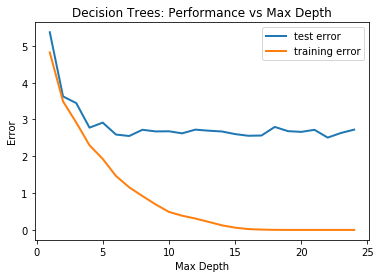

With increasing complexity, the training and testing errors decrease. A max depth of 6 best generalizes the dataset since that is where the testing error plateaus. The training error still decreases with increasing complexity, but the testing error does not improve. 



In [9]:
# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)
print("With increasing complexity, the training and testing errors decrease. " 
"A max depth of 6 best generalizes the dataset since that is where the testing " 
"error plateaus. The training error still decreases with increasing complexity, " 
"but the testing error does not improve. \n")

In [10]:
'''Fine tune the model to make prediction on unseen data.'''
# Tune and predict Model
sample_x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
sample_x = np.array(sample_x).reshape(1,-1)
fit_predict_model(city_data, sample_x)

Final Model:  DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
House: [[  1.19500000e+01   0.00000000e+00   1.81000000e+01   0.00000000e+00
    6.59000000e-01   5.60900000e+00   9.00000000e+01   1.38500000e+00
    2.40000000e+01   6.80000000e+02   2.02000000e+01   3.32090000e+02
    1.21300000e+01]]
Prediction: [ 21.62974359]


Due to randomization of the splits in grid search and the random initialization state of DecisionTreeRegressor, different runs of the above code will result in slightly different final estimators, and therefore slightly different predictions for sample data. Earlier statistics showed that the mean is 22.53 (thousand) and the standard deviation is 9.188 (thousand). One of the sample runs, predicted 20.76 (thousand) for our test sample with a max depth of 6. As a sanity check, since, 20.76 falls within one standard deviation of the mean, the model is probably valid. 